# Pertemuan 04 Data Sciece 05
## Simple Liner Regressionn
## Sumber : https://youtu.be/lcjq7-2zMSA

#### Simple Linear Regression adalah sebuah hubungan antara sebuah response varible dengan sebuah explanatory variable sebagai suatu garis lurus (linear), model ini terkenal dengan machine learning pertama.

### Sample Dataset

In [2]:
import pandas as pd
pizza = {'diameter' : [6,8,10,14,18], 'harga' : [7,9,13,17.5,18]}
pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


- data ini akan melakukan prediksi harga, diameter sebagai feature dan harga sebagai target

### Visualisasi Data

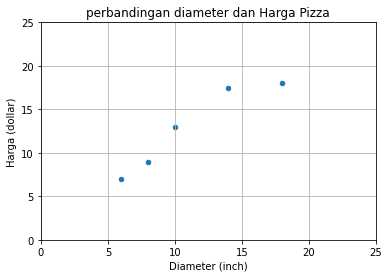

In [3]:
import matplotlib.pyplot as plt
pizza_df.plot(kind='scatter',x='diameter',y='harga')
plt.title('perbandingan diameter dan Harga Pizza')
plt.xlabel ('Diameter (inch)')
plt.ylabel ('Harga (dollar)')
plt.xlim (0,25)
plt.ylim (0,25)
plt.grid(True)
plt.show()

untuk melakukan visualisasi data perlu membuat plot berbentuk scatter plot. dengan sumbu xnya yaitu diameter dan sumbu ynya yaitu harga 

### Simple Linear Regression Model

### Penyesuaian Dataset

In [4]:
import numpy as np
X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'y:{y}')


X: [ 6  8 10 14 18]
y:[ 7.   9.  13.  17.5 18. ]


In [5]:
X = X.reshape(-1,1)
X.shape

(5, 1)

- data perlu dilakukan penyesuaian dengan cara memisahkan menggunakan numpy array. numpy array masih berbentuk satu dimensi, tapi meachine learning memerlukan dua dimensi, maka dari itu perlu reshaping
- X.reshape digunakan untuk mengubah menjadi dua dimensi atau melakukan tranformasi array. Reshaping Memerlukan dua value yaitu `(-1, 1)` value ini digunakan untuk melakukan reshape dua dimensi.

In [6]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

### Training Simple Linaer Regression Model

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

LinearRegression()

LinearRegression digunakan untuk training model.

### Visualisasi SImple Linear Regression Model

In [11]:
X_vis = np.array([0,25]).reshape(-1,1)
y_vis = model.predict(X_vis)

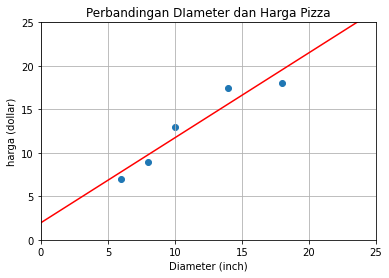

In [12]:
plt.scatter(X,y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan DIameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('harga (dollar)')
plt.xlim (0,25)
plt.ylim (0,25)
plt.grid(True)
plt.show()

- linear model akan berbentuk garis lurus.
- `X_vis` adalah sebuah feature digunakan untuk melakukan garis linear dan perlu di reshape, y_vis adalah sebuah target yang akan di prediksi dari `X_vis`.
- setelah itu melakukan proses visualisasi.
- `plt.scatter (X,y)` digunakan untuk menentukan value (dot biru)
- `plt.plot` digunakanuntuk melakukan tarik garis merah. `'-r'` digunakan untuk garis merahnya.

#### Forumla Linear Regression : $\gamma = \alpha + \beta x$
- $\gamma$ : response variable
- x : explanatery variable
- $\alpha$ : intercept
- $\beta$ : slope

In [16]:
print(f'intercept : {model.intercept_}')
print(f'slope: {model.coef_}')

intercept : 1.965517241379315
slope: [0.9762931]


- response variable atau target
- explanatery variable atau feature
- intercept yaitu titik dari sumbu y dimana garis linear menabrak atau nilai sumbu y yang bernilai 0
- slope yaitu akan berpengaruh pada garis kemiringan dari garis linear yang terbentuk.

#### Mencari nilai Slope

Nilai slope pada Linear Regresssion bisa diperoleh dengan menmanfaatkan formula berikut :


# $\beta = \frac{x,y}{var(x)}$

In [19]:
print(f'X:\n{X}\n')
print(f'X flatten:{X.flatten()}\n')
print(f'y:{y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten:[ 6  8 10 14 18]

y:[ 7.   9.  13.  17.5 18. ]


- nilai slop dapat di lihat dari formula di atas. nilai x merepresentasikan nilai features, dan nilai y merepresentasikan nilai target.
- `flatten` digunakan untuk mengembalikan kebentuk asal / meratakan kembali.

### Variance

In [9]:
variance_x = np.var(X.flatten(), ddof = 1)
print(f'variance:{variance_x}')

variance:23.2


untuk melakukan variance dapat menggunakan `np.var` yang membutuhkan 2 parameter yaitu :
- paramter pertama yaitu `X.flatten()`
- parameter kedua yaitu `ddof = 1`. ddof adalah degre of freedom

### Covariance

In [22]:
np.cov(X.flatten(),y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [7]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance :{covariance_xy}')

covariance :22.650000000000002


untuk melakukan Covariance dapat menggunakan `np.cov` yang membutuhkan 2 parameter yaitu :
- parameter pertama yaitu X.flatten()
- parameter kedua yaitu y atau target.

menggunakan `np.cov` akan menghasilkan Covariance Matrixs, pelu di ambil pada dimensi pertama yaitu index ke-0 dan dimensi kedua yaitu index ke-1 yang nanti akan ditampung menjadi variable `covariance_xy`.



### slope

In [10]:
slope = covariance_xy / variance_x
print(f'slope : {slope}')

slope : 0.976293103448276


slop akan menggunakan 2 variable yaitu `covariance_xy` dan menggunakan `variance_x`

### Mencari nilai intercept

Nilai intercept pada Linear Regression bisa diperoleh dengan memeanfaatkan formula berikut :

# $\alpha = ^-_y - \beta^-_x$

In [28]:
intercept = np.mean(y) - slope * np.mean(X)
print(f'intercept:{intercept}')

intercept:1.9655172413793096


menyelesihkan rata rata dari target diselisihkan perkalian dari slop dan rata rata featrue

### Prediksi Harga Pizza


In [30]:
diameter_pizza = np.array([12,20,23]).reshape(-1,1)
diameter_pizza

array([[12],
       [20],
       [23]])

memprediksi 3 nilai freature. dengan mengubah dari satu dimensi menjadi dua dimensi

In [31]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

melakukan prediksi dengan mengambil freature

In [34]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga) :
    print(f'Diameter : {dmtr} prediksi harga : {hrg}')

Diameter : [12] prediksi harga : 13.681034482758621
Diameter : [20] prediksi harga : 21.491379310344826
Diameter : [23] prediksi harga : 24.42025862068965


hasil prediksi bila di satukan

### Evaluasi Simple Linear Regression Model
melakukan evaluasi performa dari linear regression

#### Training & Testing Dataset

In [35]:
X_train = np.array([6,8,10,14,18]).reshape(-1,1)
y_train = np.array([7,9,13,17.5,18])

X_test = np.array([8,9,11,16,12]).reshape(-1,1)
y_test = np.array([11,8.5,15,18,11])

melakukan training dan test, feature perlu diubah menjadi dua dimensi dengan menggunakan rehaping.

#### Training SImple Linear Regression Model

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

membuat object model dan melakukan training 

#### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-Squared ($R^2$)

In [40]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)

print(f'R-squared : {r_squared}')

R-squared : 0.6620052929422553


untuk membuat coefficient of determinantion perlu melakukan prediksi nilai target dari feature X_test.

proses `r2_score` memerlukan nilai target dan hasil prediksi dari feature, hasilnya bila nilai mendekati 1 semakin baik, bila menjauhi dari 1 atau mendekat 0 maka nilainya buruk. bila buruk sekali maka hasilnya -0.

#### Mencari nilai R-squared ($R^2$)

# $R^2 = 1 - \frac{{SS}_{res}}{{SS}_{tot}}$ 

# $\mathrm{SSres} = \sum_{i = 1}^{n}(y_i - f(x_i))^2$

# $\mathrm{SStot} = \sum_{i=1}^n(y_i - y^-)^2 $

## $\mathrm{SSres}$ 
some square residual proses perhitungan selisih dari setiap nilai y pada testing set dengan nilai prediksi lalu di pangkat dua, bisa di bilang mencari akumuluasi nilai error

In [44]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1,1))[0])**2
            for x_i, y_i in zip(X_test, y_test)])
print(f'ss_res:{ss_res}')

ss_res:19.1980993608799


## $\mathrm{SStot}$
some square total proses perhitungan selisih nilai untuk setiap nilai y dengan nilai rata ratanya lalu di pangkat dua lalu di akumuluasi. 

In [50]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])
print(f'ss_tot:{ss_tot}')

ss_tot:56.8


## $R^2$

In [54]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared : {r_squared}')

R-squared : 0.6620052929422553
